In [7]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
df = sns.load_dataset("tips")
X = df[['total_bill']]
y = df["tip"]

# X['sex']= X['sex'].map({'Female':0,'Male':1})
# X['smoker']= X['smoker'].map({'No':0,'Yes':1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

r2 = r2_score(y_test, pred)
print("r-squared:", r2)


r-squared: 0.5449381659234664


In [6]:
model.predict([[16.99]])

c:\Users\Abid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.74254894])

MSE for alpha=0.001:  0.5688142433325549
MSE for alpha=0.1:  0.5688132939349223
MSE for alpha=1:  0.5688046677547026
MSE for alpha=2:  0.568795093055199
MSE for alpha=5:  0.5687664317296794
MSE for alpha=10:  0.568718871860397
MSE for alpha=20:  0.5686245341244194
MSE for alpha=30:  0.5685312357859034
MSE for alpha=40:  0.5684389729311403
MSE for alpha=50:  0.5683477416617615
MSE for alpha=100:  0.5679069237180845


<Axes: >

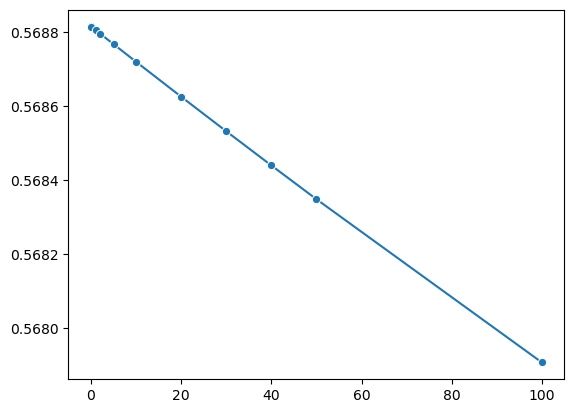

In [8]:
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train, y_train)
    
    y_pred = ridge_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for alpha={a}: ", mse)
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")

MSE for alpha=0.001:  0.5687967844208308
MSE for alpha=0.1:  0.5672185472600115
MSE for alpha=1:  0.5665976098709373
MSE for alpha=2:  0.5949152192131523
MSE for alpha=5:  0.8630735616051876
MSE for alpha=10:  1.4486680232392768
MSE for alpha=20:  1.4486680232392768
MSE for alpha=30:  1.4486680232392768
MSE for alpha=40:  1.4486680232392768
MSE for alpha=50:  1.4486680232392768
MSE for alpha=100:  1.4486680232392768


<Axes: >

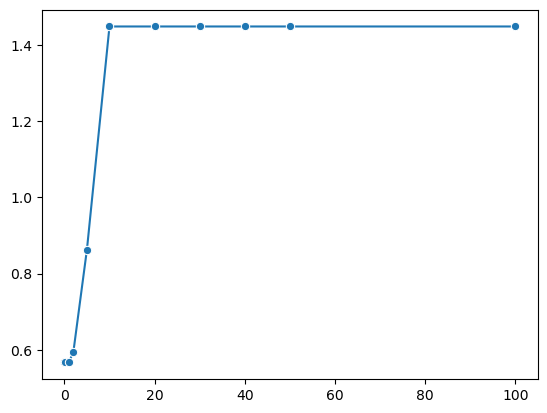

In [9]:
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses = []

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for alpha={a}: ", mse)
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")